Bernstein Vazirani Algorithm:- Using this circuit, we can find krack the passward

psudo-code:- 

    
1) Make a circuit of quantum bit and classical bit.
   
a) number of quantum bit   = length of secret key + 1 .

b) number of classical bit = length of secret key.


2) Add H-gate to all qantum bit except last quantum bit.


3) Add first x-gate and then H-gate to last quantum bit.


4) Reverse the secret key and  Add cx-gate to that quantum bit whose numbering is same as index of digit 1 of secret key.

a) Control bit will be those quantum bit whosenumbering s same as index of digit 1 in secret key.

b) Target bit will be last quantum bit.


5) Measure all quantum bit to all classical bit.

In [3]:
import qiskit
from qiskit import *
print(qiskit.__version__)
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

0.18.2


enter number: 1010
required number:  {'1010': 1}


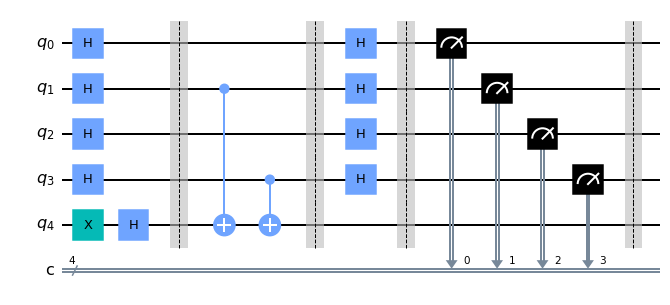

In [4]:
def find_secret_number(secter_number):
    # Using Bernstein Vazirani Algorithm
    
    secret_number = str(secter_number)
    circuit = QuantumCircuit(len(secret_number)+1, len(secret_number))

    circuit.h(range(len(secret_number)))
    circuit.x(len(secret_number))
    circuit.h(len(secret_number))
    circuit.barrier()

    for position,value in enumerate(reversed(secret_number)):
        if value == '1':
            circuit.cx(position, len(secret_number))

    circuit.barrier()
    circuit.h(range(len(secret_number)))
    circuit.barrier()

    circuit.measure(range(len(secret_number)), range(len(secret_number)))
    circuit.barrier()

#     circuit.draw(output='mpl')
    
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, backend=simulator, shots=1)
    result = job.result()
    counts = result.get_counts()
#     print(counts)
    return circuit, counts

secret_number = int(input("enter number: "))
circuit, number = find_secret_number(secret_number)
print('required number: ', number)
circuit.draw(output='mpl')